In [1]:
import heapq
import pyttsx3

# Initialize the text-to-speech engine
engine = pyttsx3.init()

# Function to simulate voice navigation
def voice_navigation(path, locations):
    for i in range(len(path) - 1):
        start = path[i]
        end = path[i + 1]
        start_coords = locations[start]
        end_coords = locations[end]
        direction = f"From {start}, head towards {end}. Distance: {graph[start][end]} km."
        
        # Print the direction to the console
        print(direction)
        
        # Speak the direction using text-to-speech
        engine.say(direction)
        engine.runAndWait()

# Define the graph as an adjacency list
graph = {
    'Dehradun': {'Rishikesh': 45, 'Doiwala': 20, 'Haridwar': 52, 'Bhaniawala': 20},
    'Bhaniawala': {'Rishikesh': 19, 'Dehradun': 20},
    'Doiwala': {'Rishikesh': 21, 'Dehradun': 20},
    'Rishikesh': {'Dehradun': 45, 'Kotdwar': 89, 'Doiwala': 21, 'Bhaniawala': 19, 'Devprayag': 69},
    'Haridwar': {'Dehradun': 52, 'Kotdwar': 70},
    'Kotdwar': {'Rishikesh': 89, 'Haridwar': 70, 'Pauri': 95},
    'Pauri': {'Kotdwar': 95, 'Devprayag': 46},
    'Devprayag': {'Satpuli': 45, 'Rishikesh': 69, 'Pauri': 46},
    'Satpuli': {'Devprayag': 45, 'Pauri': 53}
}

# Dijkstra's algorithm implementation (as provided earlier)
def dijkstra(graph, start, end):
    queue = [(0, start, [])]
    seen = set()
    min_dist = {start: 0}
    
    while queue:
        (cost, v1, path) = heapq.heappop(queue)
        
        if v1 in seen:
            continue
        
        seen.add(v1)
        path = path + [v1]
        
        if v1 == end:
            return (cost, path)
        
        for v2, c in graph[v1].items():
            if v2 in seen:
                continue
            prev = min_dist.get(v2, None)
            next = cost + c
            if prev is None or next < prev:
                min_dist[v2] = next
                heapq.heappush(queue, (next, v2, path))
    
    return float("inf")

# Find the shortest path from Dehradun to Pauri
distance, path = dijkstra(graph, 'Dehradun', 'Pauri')
print("Shortest distance:", distance, "km")
print("Path:", path)

# Coordinates of the cities (longitude, latitude)
locations = {
    'Dehradun': [78.0322, 30.3165],
    'Rishikesh': [78.2676, 30.0869],
    'Doiwala': [78.1236, 30.1730],
    'Haridwar': [78.1642, 29.9457],
    'Kotdwar': [78.5209, 29.7465],
    'Pauri': [78.7745, 30.1471],
    'Bhaniawala': [78.1443, 30.1842],
    'Satpuli': [78.7101, 29.9170],
    'Devprayag': [78.5993, 30.1459]
}

# Simulate voice navigation along the path
voice_navigation(path, locations)


Shortest distance: 154 km
Path: ['Dehradun', 'Bhaniawala', 'Rishikesh', 'Devprayag', 'Pauri']
From Dehradun, head towards Bhaniawala. Distance: 20 km.
From Bhaniawala, head towards Rishikesh. Distance: 19 km.
From Rishikesh, head towards Devprayag. Distance: 69 km.
From Devprayag, head towards Pauri. Distance: 46 km.


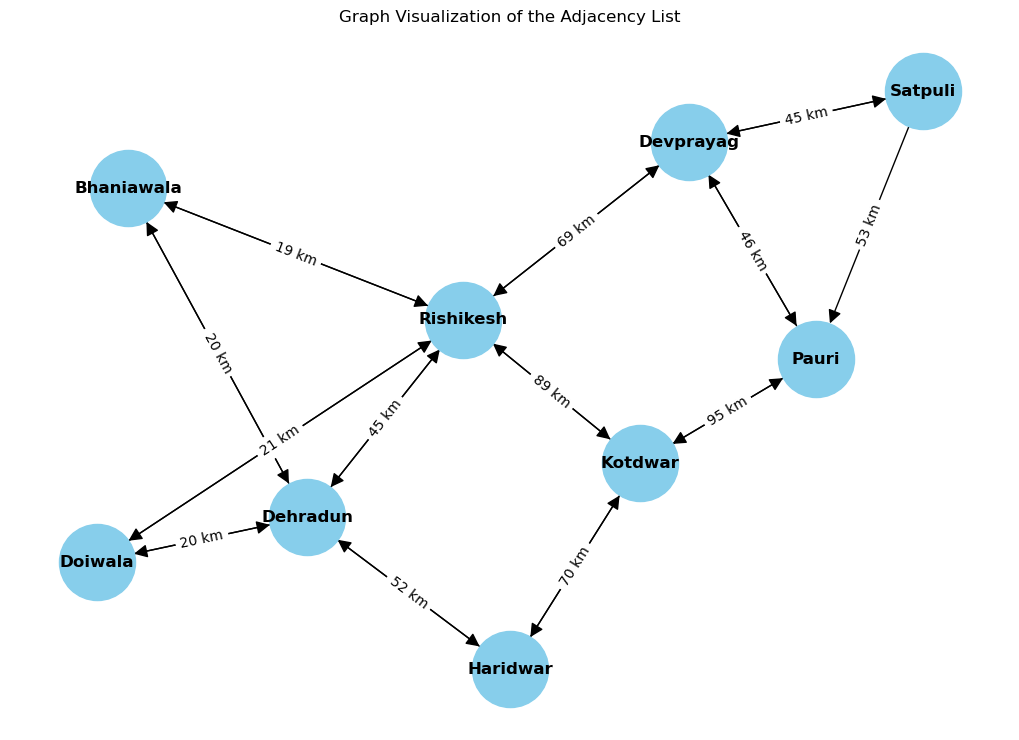

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for node, edges in graph.items():
    for adjacent_node, weight in edges.items():
        G.add_edge(node, adjacent_node, weight=weight)

# Get positions for the nodes
pos = nx.spring_layout(G)

# Draw the graph
plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=12, font_weight='bold', arrowsize=20)

# Prepare edge labels with "km"
edge_labels = {(u, v): f'{d["weight"]} km' for u, v, d in G.edges(data=True)}

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the graph
plt.title('Graph Visualization of the Adjacency List')
plt.show()

In [3]:
import pandas as pd

# Coordinates of the cities (longitude, latitude)
locations = {
    'Dehradun': [78.0322, 30.3165],
    'Rishikesh': [78.2676, 30.0869],
    'Doiwala': [78.1236, 30.1730],
    'Haridwar': [78.1642, 29.9457],
    'Kotdwar': [78.5209, 29.7465],
    'Pauri': [78.7745, 30.1471],
    'Bhaniawala': [78.1443,30.1842],
    'Satpuli': [78.7101,29.9170],
    'Devprayag': [78.5993,30.1459]
}

# Prepare the data for the DataFrame
data = {
    'S.No.': list(range(1, len(locations) + 1)),
    'Name': list(locations.keys()),
    'Longitude': [loc[0] for loc in locations.values()],
    'Latitude': [loc[1] for loc in locations.values()]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Convert the DataFrame to a string
df_string = df.to_string(index=False)

# Split the DataFrame string into lines
lines = df_string.split('\n')

# Add an extra newline after each line except the first one
formatted_lines = [lines[0]] + [line + '\n' for line in lines[1:]]

# Join the lines back into a single string
formatted_output = '\n'.join(formatted_lines)

# Display the formatted output
print(formatted_output)


 S.No.       Name  Longitude  Latitude
     1   Dehradun    78.0322   30.3165

     2  Rishikesh    78.2676   30.0869

     3    Doiwala    78.1236   30.1730

     4   Haridwar    78.1642   29.9457

     5    Kotdwar    78.5209   29.7465

     6      Pauri    78.7745   30.1471

     7 Bhaniawala    78.1443   30.1842

     8    Satpuli    78.7101   29.9170

     9  Devprayag    78.5993   30.1459



In [4]:
import openrouteservice
import folium

# Your API key from OpenRouteService
api_key = '5b3ce3597851110001cf62482c3227e7c9c1459fa9a0e756923aab5d'

# Initialize the ORS client
client = openrouteservice.Client(key=api_key)

# Get the route that follows actual roads
route_coords = []
for i in range(len(path) - 1):
    start_coords = locations[path[i]]
    end_coords = locations[path[i + 1]]
    route = client.directions(coordinates=[start_coords, end_coords], profile='driving-car', format='geojson')
    route_coords += route['features'][0]['geometry']['coordinates']

# Convert the route coordinates from (longitude, latitude) to (latitude, longitude)
route_coords = [(lat, lon) for lon, lat in route_coords]

# Create a map centered around Dehradun
mymap = folium.Map(location=locations['Dehradun'][::-1], zoom_start=10)

# Add markers for each city in the path
for city in path:
    coords = locations[city]
    folium.Marker(location=coords[::-1], popup=city).add_to(mymap)

# Add lines for the shortest path
folium.PolyLine(locations=route_coords, color='red').add_to(mymap)

# Save the map to an HTML file
mymap.save("shortest_path.html")

# Display the map 
mymap
